<font color='red'>
<ol type='1'>
<li>Assemble training inputs and outputs, create and train a network. 10/10</li>
<li>Plot training accuracy over epochs. 3/3</li>
<li>Train networks with batch size 1 and batch size N. 3/3</li>
<li>Test network and plot results. 4/4</li>
</ol>

Total: 20/20
</font>

## Homework 5 Starting Code

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as R
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

# supress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [8]:
## generate N random samples from a 2D multivariate normal distribution
##
## with mean [mx, my]
##
## with covariance matrix [[  sx*sx, r*sx*sy],
##                         [r*sx*sy,   sy*sy]]
## where sx is the standard deviation along the x dimension
## where sy is the standard deviation along the y dimension
## where r is the correlation between the dimensions
##

def gensamples(N, mx, my, sx, sy, r):
    M   = np.array([mx, my])
    Cov = np.array([[  sx*sx, r*sx*sy],
                    [r*sx*sy,   sy*sy]])
    return (R.multivariate_normal(M, Cov, size=N, check_valid='warn'))

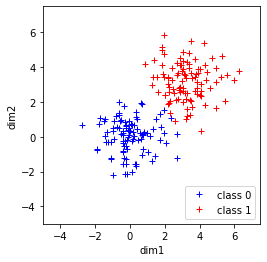

In [9]:
# classification problem used in Q1

mx0 = 0.;  my0 = 0.
sx0 = 1.;  sy0 = 1.
r0 = 0.

mx1 = 3.; my1 = 3.
sx1 = 1.; sy1 = 1.
r1 = 0.

N = 100

sample0 = gensamples(N, mx0, my0, sx0, sy0, r0)

sample1 = gensamples(N, mx1, my1, sx1, sy1, r1)

# plot example
plt.plot(sample0[:,0],sample0[:,1],'b+',sample1[:,0],sample1[:,1],'r+')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.axis('square')
plt.legend(('class 0', 'class 1'), loc='lower right')
xymin = -5; xymax = 7.5
plt.ylim((xymin,xymax))
plt.xlim((xymin,xymax))
plt.show()

<hr>

<b>Q1 (10 point).</b> Write Keras code to learn this classification problem with a neural network with an input layer containing two nodes (for the x and y dimension) and output node. 

In [10]:
#initializes the network
network = models.Sequential()

total_samples = np.concatenate([sample0, sample1]) #training patterns by n-in
teacher = np.zeros([total_samples.shape[0],1], dtype = int) #teacher by n-out

for index, each_row in enumerate (teacher): #does a for loop through the teacher matrix and puts in the correct number of 0's and 1's
    if index > ((total_samples.shape[0]/total_samples.shape[1])-1):
        each_row[0] = 1

#builds the network by taking in the parameters for output (1), the activation function, which in this case is sigmoidal since the outputs are between 0 and 1, and the the number of inputs
build_network = network.add(layers.Dense(1,
                         activation='sigmoid',
                         input_shape=(total_samples.shape[1],)))

#setting the SGD to have a learning rate of 0.01, momentum of 0.9, and a decay of 1e-6
modifiedSGD = SGD(lr=0.01, momentum=0.9, decay=1e-6)

#compiles the network using a custom SGD--the modifiedSGD
compile_network = network.compile(optimizer=modifiedSGD,
                loss='mean_squared_error',
                metrics=['accuracy', 'mse'])

#trains the network
history = network.fit(total_samples,
                      teacher,
                      validation_split=.1,
                      epochs=30,
                      batch_size=20)

Epoch 1/30
1/9 [==>...........................] - ETA: 1s - loss: 0.1530 - accuracy: 0.7000 - mse: 0.1530

d:\Users\chowjk\Projects\NSC3270-Fall2021\nscEnv\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


9/9 [==============================] - 0s 11ms/step - loss: 0.1864 - accuracy: 0.7278 - mse: 0.1864 - val_loss: 0.1329 - val_accuracy: 0.8000 - val_mse: 0.1329
Epoch 2/30
9/9 [==============================] - 0s 3ms/step - loss: 0.1687 - accuracy: 0.7778 - mse: 0.1687 - val_loss: 0.0756 - val_accuracy: 0.9500 - val_mse: 0.0756
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.8000 - mse: 0.1520 - val_loss: 0.0475 - val_accuracy: 1.0000 - val_mse: 0.0475
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.8167 - mse: 0.1398 - val_loss: 0.0364 - val_accuracy: 1.0000 - val_mse: 0.0364
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.8167 - mse: 0.1301 - val_loss: 0.0314 - val_accuracy: 1.0000 - val_mse: 0.0314
Epoch 6/30
9/9 [==============================] - 0s 2ms/step - loss: 0.1210 - accuracy: 0.8500 - mse: 0.1210 - val_loss: 0.0293 - val_accuracy: 1.0000 - val_ms

<hr>

<b>Q2 (3 points).</b> Create a plot of training accuracy as a function of epoch (with axes properly labeled).

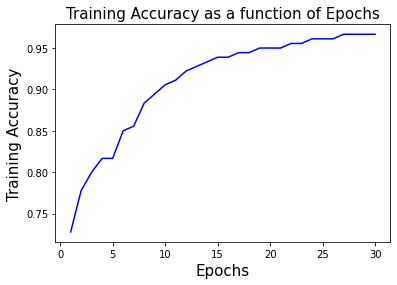

In [11]:
#Creates a function that takes the parameters--title of graph, label of x axis, 
#label of y axis, font size, color of graph, x-values from the input, and y-values 
#from the operation done on the input--and plots them on a graph
def functions_plot (title, xlabel, ylabel, fontsize, color, inputs, function):
    fig = plt.figure()
    plt.xlabel(xlabel, fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.title(title, fontsize = fontsize)
    p = plt.plot(inputs, function, color=color)
    
#the number of epochs; this is your y values
n_epochs = len(history.history['loss'])

#an array from 1 to the number of epochs; this is your x values
input_array = np.arange(1,(n_epochs+1),1)

#plots traininc accuracy as a function of epochs
functions_plot ('Training Accuracy as a function of Epochs', 'Epochs', 'Training Accuracy', 15, 'blue', input_array, history.history['accuracy'])

<hr>

<b>Q3 (3 points).</b> Explore what happens when you (a) set the batch size equal to 1 (so that weights get updated after every training pattern), and (b) set the batch size equal to the total number of training patterns (so that weights get updated once per epoch after all of the training patterns have been shown). 

#### When you set the batch size equal to 1, this means that the weights of the network are getting updated after every single training pattern since in our current sample size of 200, the network is being training after every single sample, which is why the accuracy for epoch_1 starts at a much higher value than the accuracy for epoch_1 when the batch size is equal to the total number of training patterns. When the latter occurs, the weights are being updated only ONCE per epoch--so they only get updated 20 times during the entire training of the network, while when the batch size is equal to 1, the weights are being updated a total of 4000 times (20 epochs * being updated for 200 samples). Therefore, it makes sense for when the batch size equals to the total number of training patterns, the accuracy starts at a much lower value, but more importantly after 20 epochs, the final accuracy is no where near 1, it is still around 0.75. This is expected since the weight are being updated only 20 times instead of 400 times

Epoch 1/30
180/180 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.6944 - mse: 0.2183 - val_loss: 0.0240 - val_accuracy: 1.0000 - val_mse: 0.0240
Epoch 2/30
180/180 [==============================] - 0s 701us/step - loss: 0.0515 - accuracy: 0.9500 - mse: 0.0515 - val_loss: 0.0420 - val_accuracy: 1.0000 - val_mse: 0.0420
Epoch 3/30
180/180 [==============================] - 0s 771us/step - loss: 0.0357 - accuracy: 0.9778 - mse: 0.0357 - val_loss: 0.0156 - val_accuracy: 1.0000 - val_mse: 0.0156
Epoch 4/30
180/180 [==============================] - 0s 648us/step - loss: 0.0289 - accuracy: 0.9778 - mse: 0.0289 - val_loss: 0.0147 - val_accuracy: 1.0000 - val_mse: 0.0147
Epoch 5/30
180/180 [==============================] - 0s 707us/step - loss: 0.0247 - accuracy: 0.9778 - mse: 0.0247 - val_loss: 0.0149 - val_accuracy: 1.0000 - val_mse: 0.0149
Epoch 6/30
180/180 [==============================] - 0s 715us/step - loss: 0.0226 - accuracy: 0.9833 - mse: 0.0226 - val_

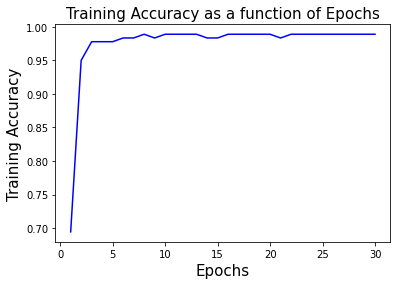

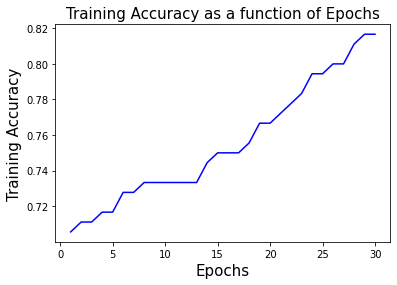

In [12]:
network1 = models.Sequential()

#builds the network by taking in the parameters for output (1), the activation function, which in this case is sigmoidal since the outputs are between 0 and 1, and the the number of inputs
build_network1 = network1.add(layers.Dense(1,
                         activation='sigmoid',
                         input_shape=(total_samples.shape[1],)))

#compiles the network using a custom SGD--the modifiedSGD
compile_network1 = network1.compile(optimizer=modifiedSGD,
                loss='mean_squared_error',
                metrics=['accuracy', 'mse'])

#trains the network
history1 = network1.fit(total_samples,
                       teacher,
                       validation_split=.1,
                       epochs=30,
                       batch_size=1)

network2 = models.Sequential()

#builds the network by taking in the parameters for output (1), the activation function, which in this case is sigmoidal since the outputs are between 0 and 1, and the the number of inputs
build_network2 = network2.add(layers.Dense(1,
                         activation='sigmoid',
                         input_shape=(total_samples.shape[1],)))

#compiles the network using a custom SGD--the modifiedSGD
compile_network2 = network2.compile(optimizer=modifiedSGD,
                loss='mean_squared_error',
                metrics=['accuracy', 'mse'])

#trains the network
history2 = network2.fit(total_samples,
                       teacher,
                       validation_split=.1,
                       epochs=30,
                       batch_size=total_samples.shape[0])

#plots the training accuracy vs. number of epochs
functions_plot ('Training Accuracy as a function of Epochs', 'Epochs', 'Training Accuracy', 15, 'blue', input_array, history1.history['accuracy'])
functions_plot ('Training Accuracy as a function of Epochs', 'Epochs', 'Training Accuracy', 15, 'blue', input_array, history2.history['accuracy'])

<hr>

<b>Q4 (4 points).</b> Homework5.ipynb provides code that generates an array of test patterns and provides a plottest() function that displays a shaded contour plot of network predictions on these test patterns (these were discussed in class). All you need to do is apply these test patterns to the trained network from Q1 and plot the results using the plottest() function. 

In [13]:
# generate test pattern array for Q4

xymin = -5
xymax = 7.5
Npts = 50
xv, yv = np.meshgrid(np.linspace(xymin, xymax, Npts), 
                     np.linspace(xymin, xymax, Npts))
test_pats = np.concatenate((xv.reshape((Npts*Npts,1)), 
                            yv.reshape((Npts*Npts,1))), axis=1)

In [14]:
# function for generating plot for Q4
# xv is array of x-values of test grid (from meshgrid)
# yv is array of y-values of test grid (from meshgrid)
# out is the output of the neural network given the test patterns
# sample0, sample1 are the training patterns from earlier

def plottest(xv, yv, out, sample0, sample1):
    # reshape out
    zv = out.reshape(xv.shape)

    # create figure
    fig = plt.figure()
    plt.contourf(xv, yv, zv, levels=xv.shape[0], cmap=plt.cm.gist_yarg)
    plt.plot(sample0[:,0], sample0[:,1], 'b+', 
             sample1[:,0], sample1[:,1], 'r+')    
    
    plt.xlabel('dim1')
    plt.ylabel('dim2')
    plt.axis('equal')
    plt.axis('square')
    xymin = -5; xymax = 7.5
    plt.ylim((xymin,xymax))
    plt.xlim((xymin,xymax))
    plt.show()

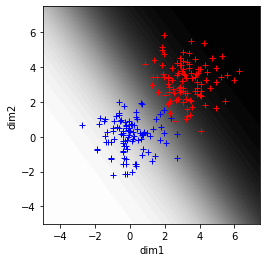

In [15]:
#test the network on test_pats
out_test = network.predict(test_pats)

#uses the plottest function to plot a contour map based on the output of the neural network1 given the test patterns
plottest (xv, yv, out_test, sample0, sample1)